<h1 align='center'><b> Million Songs Data - Recommendation System </b> </h1>

**Thành viên thực hiện:**

*  20280020:  Huỳnh Việt Dũng
*  20280094:  Lê Hoài Thương
*  20280095:  Nguyễn Ngọc Anh Thy

**Giảng viên môn học:** Huỳnh Thanh Sơn

## **Why this is important?**

**The context:** 

With the advent of technology, societies have become more efficient with their lives. At the same time, however, individual human lives have also become more fast-paced and distracted, leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has in fact made it easier for humans with a shortage of time to find and consume good content.

Almost every internet-based company's revenue relies on the time consumers spend on it's platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent and make their experience better. Therefore, one of the key challenges for these companies is figuring out what kind of content their customers are most likely to consume.

Also most people enjoy listening to music and the challenge of recommending music to a user is easy to understand for a non technical audience.


**The objectives:** 

The objective of this project is **to build a recommendation system to predict the top_n songs for a user based on the likelihood of listening to those songs.**

This project showcases my ability to rapidly learn and develop machine learning solutions while laying the foundation for building a robust production-grade tool that demonstrates the complete end-to-end machine learning process. In the future, I aim to deploy an interactive tool as a demonstration for prospective employers.



## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

### song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

### count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

**Why this dataset?**

- It is freely available to the public.
- It is a large enough dataset for the purpose of this project.

## **Approach**

* Load and understand the data

* Data cleaning and feature engineering, some steps taken inclde:

     - I  combined the datasets to create a final dataset for our analysis
     - For easier analysis  I encoded user_id and song_id columns
     - I filtered the data such that the data for analysis contains users who have listened to a good count of songs
     - I also filtered the data for songs that have been listened to a good number of times

* Exploratory Data Analysis

* I built recommendation systems using 6 different algorithms:

     - Rank/Popularity - based recommendation system
     - User-User similarity-based collaborative filtering
     - Item-Item similarity-based collaborative filtering
     - Model based collaborative filtering / Matrix factorization
     - Clustering -  based recommendation system
     - Content based recommendation system


* To demonstrate clustering-based recommendation systems, the surprise library was used.


* Grid search cross-validation was used to tune hyperparameters and improve model perfomance.


* I used RMSE, precision@k, recall@k and  F_1 score to evaluate model perfomance.


* In the future I hope to improve the performance of these models using hyperparameter tuning.



### **Importing Libraries**

In [152]:

# Libraries for numeric and dataframe computation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings given as output of the code
import warnings
warnings.filterwarnings('ignore')

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Loading the dataset**

In [153]:
# Importing the datasets
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

### **Understanding the data by viewing a few observations**

In [154]:
# See top 5 records of count_df data
count_df.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [155]:
# See top 5 records of song_df data
song_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


### **Checking the data types and missing values of each column**

In [156]:
# See the information of count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [157]:
# See the information of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### Observations and Insights:




*   The **count_df** data has 2,000,000 entries and 4 columns of data types; Unnamed: 0: int64, user_id: object, song_id: object, play_count: int64.

*   The column Unnamed: 0 is redundant and can be dropped.


*   The **song_df** data has 1,000,000 entries and 5 columns of data types; song_id: object, title: object, release: object, artist_name: object, year: int64. 

*  The title and release columns have a few missing values. Some of the years are missing.



In [158]:
# Left merging the count_df and song_df data on "song_id" and dropping duplicates from song_df data simultaneously
count_with_song = pd.merge(count_df,song_df.drop_duplicates(['song_id']),on='song_id', how='left')

### Note: 
* The columns **user_id** and **song_id** are encrypted possibly to provide anonymity. To ease our processing of the dataset we will use label encodings to process these two variables (encode them to numeric features)


In [159]:


# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit transform the user_id column
count_with_song['user_id'] = le.fit_transform(count_with_song['user_id'])

# Fit transform the song_id column
count_with_song['song_id'] = le.fit_transform(count_with_song['song_id'])

count_with_song.shape

(2000000, 7)

### Thoughts:
* As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [160]:
# Get the column containing the users
users = count_with_song.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [161]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

count_with_song = count_with_song.loc[ ~ count_with_song.user_id.isin(remove_users)]

In [162]:
# Lets get the column containing the songs
songs = count_with_song.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [163]:
# We want our song to be listened by atleast 120 users to be considered
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= count_with_song.loc[ ~ count_with_song.song_id.isin(remove_songs)]

In [164]:
# Dropping records with play_count more than(>) 5
df_final.drop(df_final.index[df_final['play_count'] > 5], inplace= True)

In [165]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### Checking the total number of unique entries in the data

In [166]:
df_final.nunique()

user_id        3155
song_id         563
play_count        5
title           561
release         369
artist_name     232
year             37
dtype: int64

#### Observations and Insights:



From our df_final dataframe

*   The total number of unique user_id is 3155
*   The total number of unique song_id is 563
*   The total number of unique artists is 232
*   There are 3155 unique user_id and 563 unique song_id meaning we could have upto (3155*563) = 1,776,265 interactions but we only have 117,876 hence the data is sparse

### Exploring the most interacted songs and interacted users

Most interacted songs

In [167]:
df_final['song_id'].value_counts()

song_id
8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: count, Length: 563, dtype: int64

Most interacted users

In [168]:
df_final['user_id'].value_counts()

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: count, Length: 3155, dtype: int64

#### Observations and Insights:


From our df_final dataframe


*   The most interacted user is user_id 61472 at 243 times
*   The most interated song is song_id 8582 at 751 times
*   The user 61472 has interacted with the most songs,243 times.But still there is a possibility of 3155 - 243 = 2912 more interactions as we have 3155 unique users.For those 2912 remaining users we will build recommendation systems to predict which songs are most likely to be played by the user




Songs played in a year

In [169]:
count_songs = df_final.groupby('year').count()['title'] # Counting the number of songs in each year

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail() # Displaying the last 5 records

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


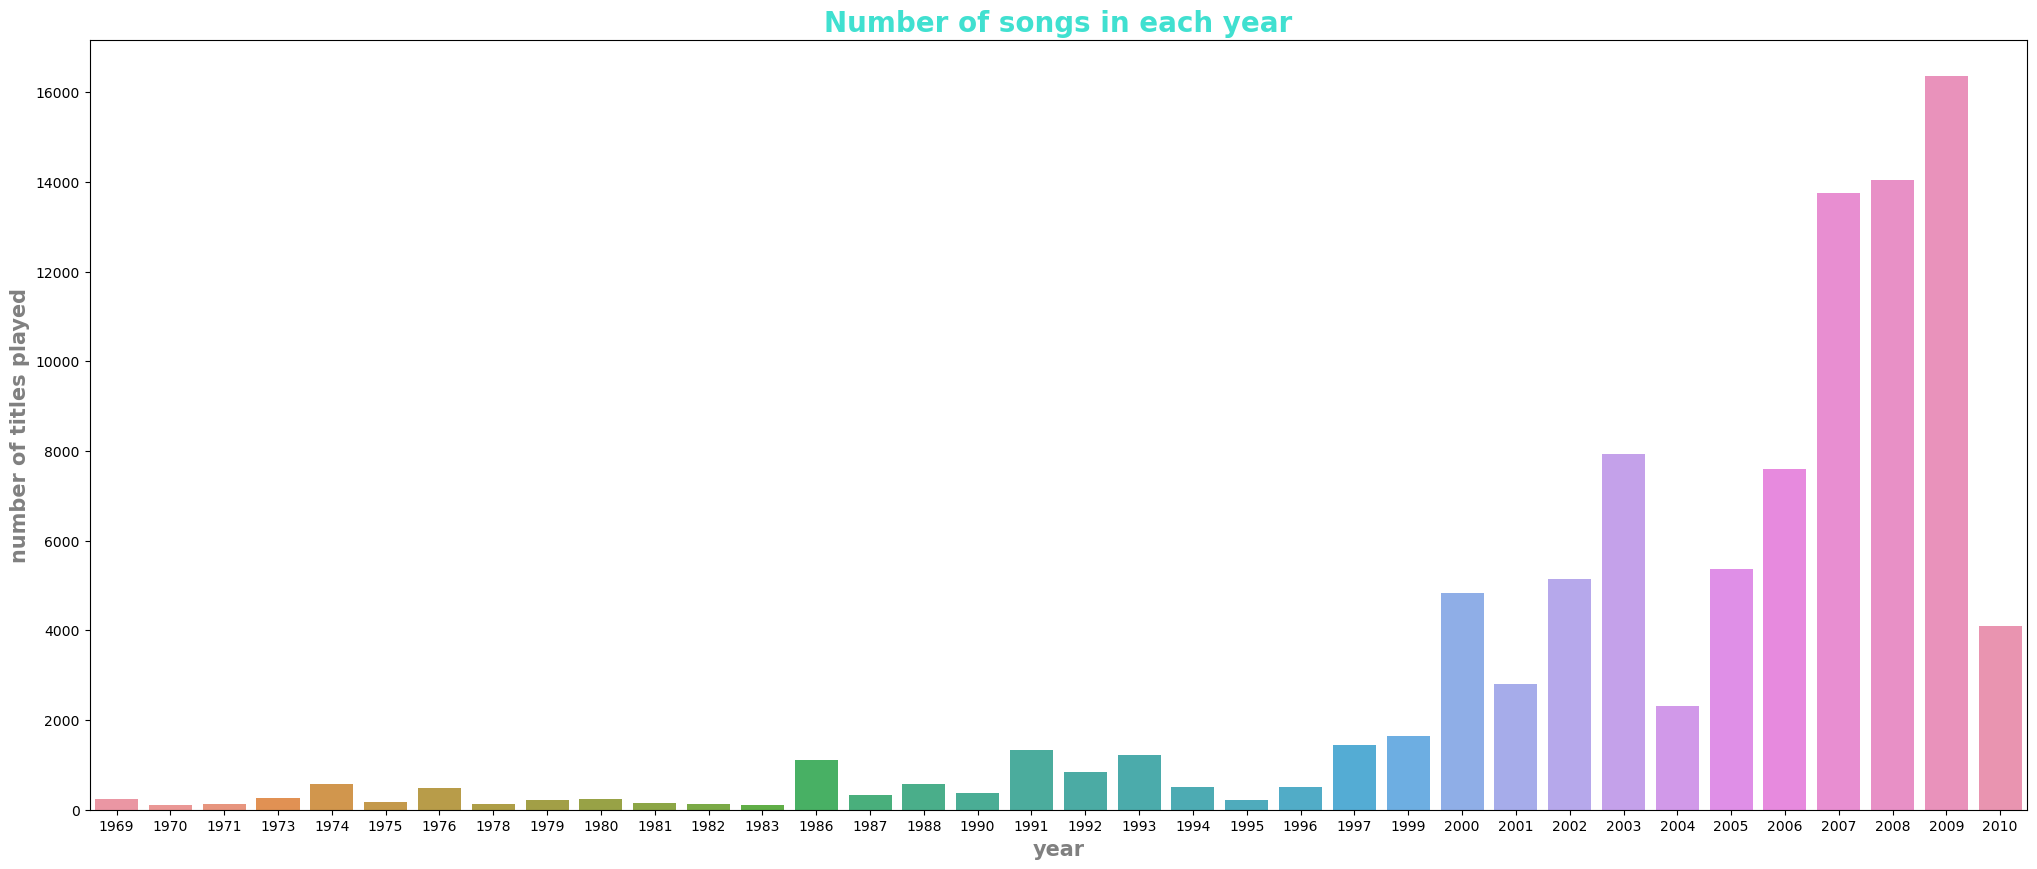

In [170]:
# Creating a plot for the number of songs in each year

# Setting the figure size
plt.figure(figsize = (25, 10)) 

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Setting the y, x label and title of the plot
plt.ylabel('number of titles played',fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'gray'})
plt.xlabel('year',fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'gray'}) 
plt.title('Number of songs in each year',fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'turquoise'}) 

# Show the plot
plt.show()

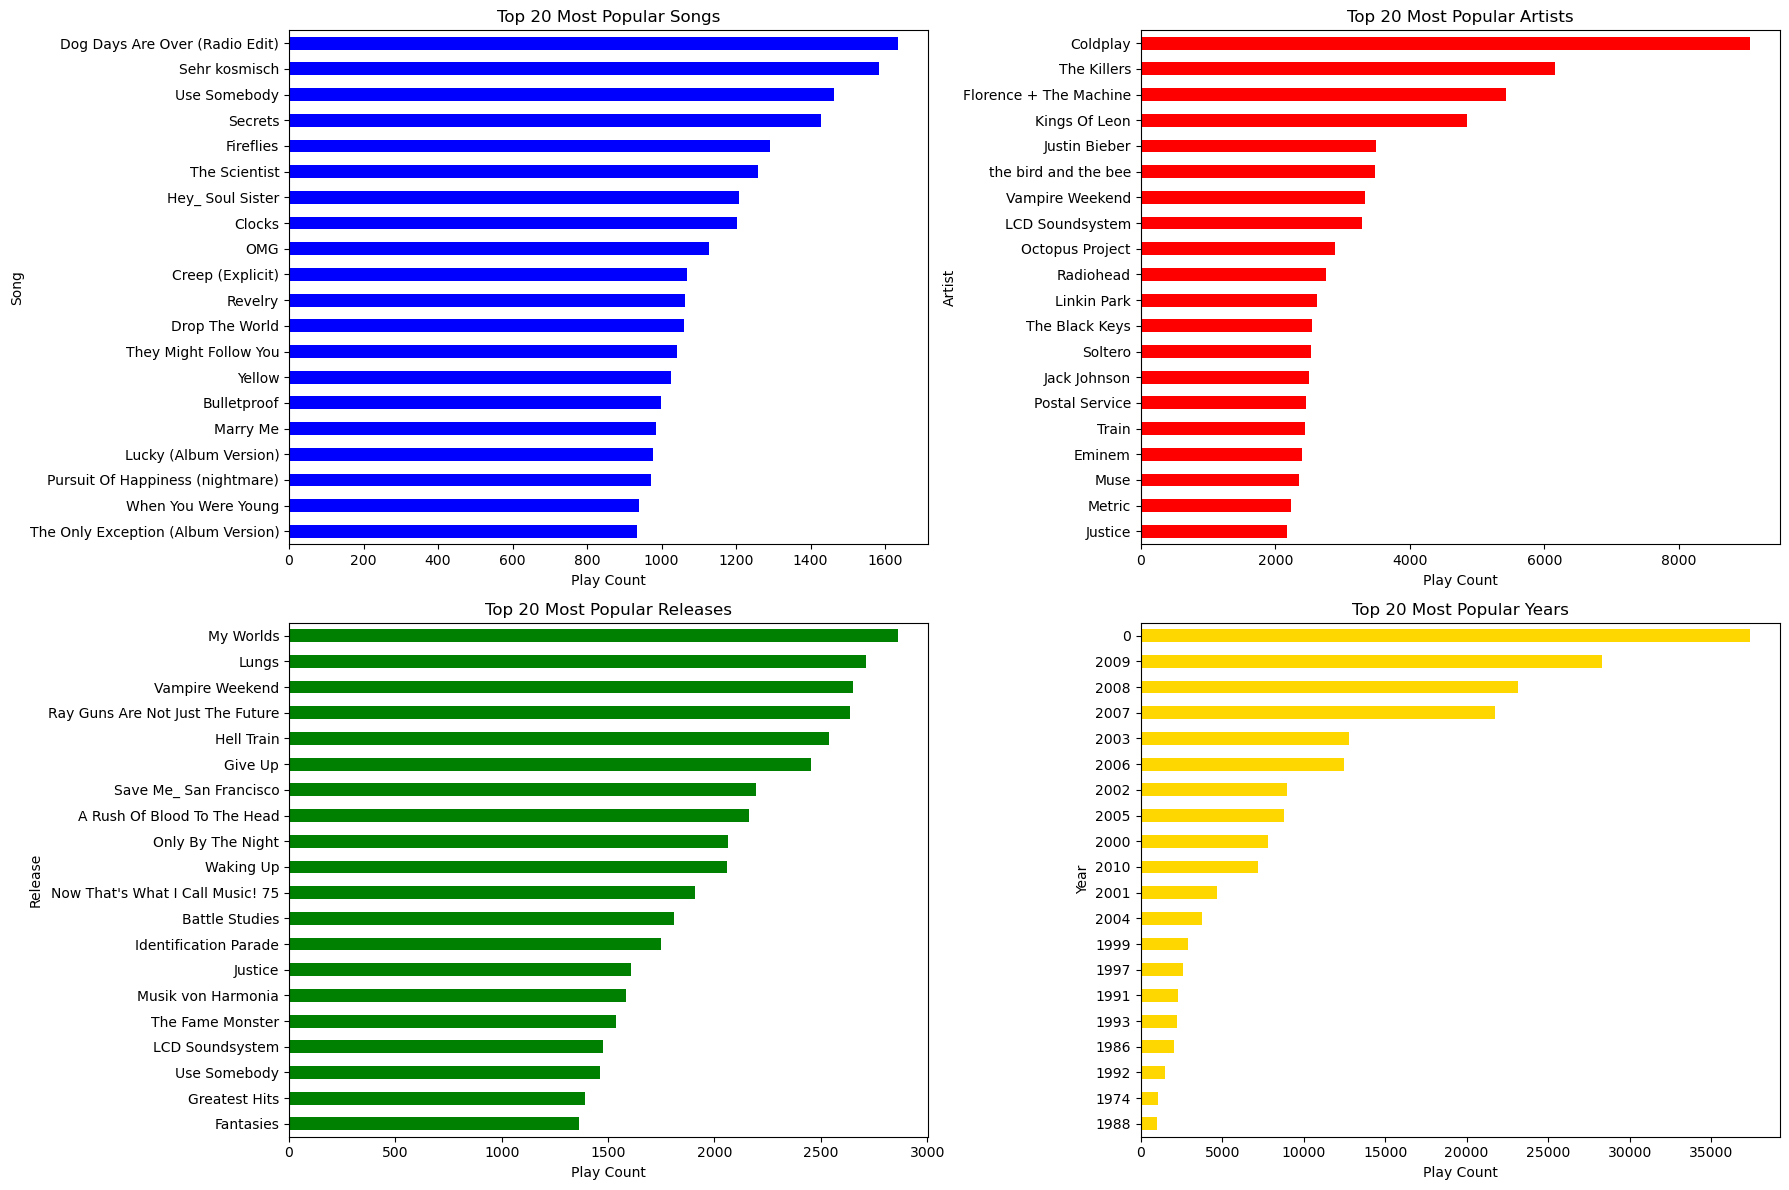

In [234]:
# Top 20 most popular songs
top_songs = df_final.groupby('title')['play_count'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
top_songs.sort_values().plot(kind='barh', color='blue')
plt.title('Top 20 Most Popular Songs')
plt.xlabel('Play Count')
plt.ylabel('Song')

# Top 20 most popular artists
top_artists = df_final.groupby('artist_name')['play_count'].sum().sort_values(ascending=False).head(20)
plt.subplot(2, 2, 2)
top_artists.sort_values().plot(kind='barh', color='red')
plt.title('Top 20 Most Popular Artists')
plt.xlabel('Play Count')
plt.ylabel('Artist')

# Top 20 most popular releases
top_releases = df_final.groupby('release')['play_count'].sum().sort_values(ascending=False).head(20)
plt.subplot(2, 2, 3)
top_releases.sort_values().plot(kind='barh', color='green')
plt.title('Top 20 Most Popular Releases')
plt.xlabel('Play Count')
plt.ylabel('Release')

# Top 20 most popular years
top_years = df_final.groupby('year')['play_count'].sum().sort_values(ascending=False).head(20)
plt.subplot(2, 2, 4)
top_years.sort_values().plot(kind='barh', color='gold')
plt.title('Top 20 Most Popular Years')
plt.xlabel('Play Count')
plt.ylabel('Year')

plt.tight_layout()
plt.show()


#### Observations and Insights:



*   After the year 1999, there a significant increase in the number of songs played.

*   The years 2007, 2008, and 2009 experienced the highest number of songs played, with 2009 having the highest count of titles played.

*   Before 1999, a limited number of songs were played, and some years, such as 1978 to 1983, had extremely low play counts.


**Understanding the final dataset**

In [172]:
df_final.info()
df_final

<class 'pandas.core.frame.DataFrame'>
Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


Having explored the final data set, next I will apply different algorithms to build recommendation systems.

### Note: 
I will be using the df_final data, i.e., the data after the cutoffs.

### **1. Popularity-Based Recommendation System**

This is helpful in the case of cold start problems (when you don't have data points say for a new user to a platform)

Taking the count and sum of play counts of the songs to build the popularity recommendation systems based on the sum of play counts.

In [173]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].count()

In [238]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let's see the first five records of the final_play dataframe
final_play

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115
...,...,...
9939,1.683983,231
9942,2.486667,150
9960,1.597122,139


Now, I create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [175]:
# Build the function to find top n songs
def top_n_songs(data, n, min_interaction = 100):
    
    # Finding songs with minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]
    
    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

In [176]:
# Recommending top 10 songs using the function **top_n_songs**
list(top_n_songs(final_play, 10, 50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

### **2. User User Similarity-Based Collaborative Filtering**

In building the user-user-similarity-based and subsequent models I will use the "surprise" library, a python scikit for building and evaluating recommender systems.

In [177]:
# Installing the surprise package using pip. 
!pip install surprise 



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [178]:
# Importing necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, the data will be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions:

Below is the function to calculate RMSE, precision, recall, and F1_Score to evaluate the model performance.

In [179]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score

def precision_recall_at_k(model, k = 30, threshold = 1.5):

    """
    Return precision and recall at k metrics for each user

    """
    # First, mapping the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sorting user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Here I set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Here i set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [180]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale= (0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id','song_id', 'play_count']], reader) # Taking only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size= 0.4, random_state = 42) # Taking test_size = 0.4

In [181]:
# Building the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) 

# Training the algorithm on the trainset, and predicting play_count for the testset
sim_user_user.fit(trainset)

# Computing precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


### Observations and Insights:



*   RMSE is 1.09 : This is how far the overall predicted play_count are from the actual rating on either end

*   Precision is 0.40 : This means out of all recommended songs 40% are relevant

*   Recall is 0.70 : This means out of all relevant songs, 70% are recommended 

*   F_1 score of the default model is 0.504 indicating that mostly recommended songs are relevant and relevant songs were recommended to the user. We can try to improve this using GridSearchCV by tuning different hyperparameters of this algorithm.



In [182]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Using user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [183]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Using user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

### Observations and Insights:



*   The above out put shows that the actual play_count of the user - item pair is 2 and predicted play_count is 1.80 by the user - user similarity - based default model. This shows that the actual play_count is not so far from the predicted play_count

*   The model is under estimating the play_count

*   The output also contains "actual_k". This is the value of K in KNN that is used while training the model


Now, I'll try to tune the model and see if the model performance improves.

In [184]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
gs.fit(data) # Using entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson

In [185]:
# Training the best model found in above gridsearch
# Using the optimal similarity measure for user-user-based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 30
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


### Observations and Insights:



*   We can observe from the above that after tuning hyperparameters, F_1 score of the tuned model has improved slightly compared to the default model

*   Additionally the RMSE of the model has gone down as compared to the model before hyperparameter tuning

*   We can say that the model has improved slightly after hyperparameter tuning





In [186]:
# Predicting the play count for a user who has listened to the song. Taking user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [239]:
# Predicting the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

### Observations and Insights:


*   The estimated play_count for user_id 6958 improved using the tuned model as compared to the default model from 1.80 to 1.96, this is closer to the actual which is 2

### Thoughts:
Along with making predictions on listened and unknown songs can, we get 5 nearest neighbors (most similar) to a certain song

In [240]:
# Using user id 0
sim_user_user_optimized.get_neighbors(0, 5) # Taking 5 nearest neighbors to user_id 0

[2527, 2768, 760, 1884, 1965]

Below I will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [189]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating a user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those song ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:
        
        # Predicting the ratings for those non played song ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [190]:
# Making top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final,6958, 5, sim_user_user)

In [191]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.141147
1,614,2.525000
2,5653,2.514023
3,352,2.425000
4,6450,2.394927


### Observations and Insights:

The above Dataframe shows top 5 recommendations for a user_id 6958 

### Correcting the play_counts and Ranking the above songs

In [192]:
def ranking_songs(recommendations, final_rating):
  # Sorting the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merging with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Ranking the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sorting the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)
  
  return ranked_songs

### Thoughts:
In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. Depending of a business' objective we can add this quantity instead of subtracting.In the production environment, particular songs can be boasted or their reach limited as desired.

In [193]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,107,3.141147,3.044473
1,614,373,2.525000,2.473222
2,5653,108,2.514023,2.417798
0,352,748,2.425000,2.388436
4,6450,102,2.394927,2.295913


### Observations and Insights:



*   In the above-corrected rating formula, we could add the quantity 1 / np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some songs with play_count 5 and we can't have a play_count more than 5 for a song


*   While comparing the play_count of two songs, it is not only the play_counts that describe the likelihood of the user to that song. Along with the play_count the number of users who have played that song also becomes important to consider. Due to this, we have calculated the "corrected_ratings" for each song. Commonly, the higher the "play_count" of a song the more it is liked by users. To interpret the above concept, a song played 4 times by 3 people is less liked in comparison to a song played 3 times by 50 people



### **3. Item Item Similarity-based collaborative filtering recommendation system**

In [194]:
# Applying the item-item similarity collaborative filtering model with random_state = 1 and evaluating the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# Using KNN algorithm is to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Using random_state = 1 

# Training the algorithm on the trainset, and predicting play_count for the testset
sim_item_item.fit(trainset)

# Computing precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item) # Using sim_item_item model

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


### Observations and Insights:


*   The baseline model is giving an F_1 score of 0.397, this is lower in comparison to the user user similarity-based collaborative filtering (F_1 score = 0.504). I will try to improve this by using GridSearchCV

In [195]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True) # Using user_id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [196]:
# Predicting the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 3232, verbose = True) # Using user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

### Observations and Insights:

The predicted play_count for user_id 6958 is lower compared to the user user similarity-based collaborative filtering recommendation system

In [197]:
# Applying grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

""" 
Performing a grid search using 3-fold cross-validation to find the best set of hyperparameters
with respect to the RMSE.

n_jobs: Specifies the number of parallel jobs to run during the grid search. The value -1 indicates
that the code will use all available processors for computation.

"""
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1) 
# Fitting the data
gs.fit(data)

# Finding the best RMSE score
print(gs.best_score['rmse'])

# Extracting the combination of parameters that give the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Co

### Thoughts:
* In the future I will experiment with other hyperparameters to try further improve the performance of the model.

In [198]:
# Applying the best model found in the grid search
sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Computing precision@k and recall@k with k = 30
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


### Observations and Insights:



*   We can see from above that after tuning hyperparameters, F_1 score of the tuned model is much better than the default model. Also, there is a fall in the RMSE value after tuning the hyperparameters. Hence the tuned model is doing better than the baseline model.
*   In comparison to the user user similarity based recommendation system,this F_1 score is lower



In [199]:
# Predicting the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [200]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, r_ui = 2, verbose = True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

### Observations and Insights:

The est = 1.96 for user_id 6958 for song_id 1671 using the tuned model is btter than the est = 1.36 using the default model,hence the tuned model seems to be performing better.

In [201]:
# Finding five most similar items to the item with id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [202]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [203]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [204]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


### **4. Model Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** (features that explain the patterns and relationships) to find recommendations for each user.

Some advantages of using Matrix factorization here are: It can handle sparse data since it can predict missing ratings by estimating the values based on the learned latent factors. It can also capture complex patterns and relationships in user-item interactions, making it suitable for providing personalized recommendations.

In [205]:
# Building a baseline model using svd
# Using SVD (Singular Value Decomposition) matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


The baseline model with the algorithm is giving a  F-1 score (almost 50%). It indicates a fair performance by the model

In [206]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), taking r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

As the actual play_count for this user-item pair is 2 and the predicted rating is 1.27. It seems like the model is under-estimated the rating. I will try to fix this later by tuning the hyperparameters of the model using GridSearchCV.

In [207]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [208]:
# Setting the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

""" 
Performing a grid search using 3-fold cross-validation to find the best set of hyperparameters
with respect to the RMSE.

n_jobs: Specifies the number of parallel jobs to run during the grid search. The value -1 indicates
that the code will use all available processors for computation.

"""
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0125023256468835
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


### Thoughts
* In the future I will experiment with other hyperparameters to try further improve the performance of the model.

In [209]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# computing precision@k and recall@k also with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


### Observations and Insights:

From the above results the tuned model is showing a better F_1 score than the baseline model, also the RMSE has gone down. Hence the tuned model is doing better than the earlier model.

In [210]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [211]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

### Observations and Insights:



*   The predicted play_count is fairly good here for a song whose actual play_count 
is 2. The optimized model is giving a fairly good prediction

*  For an unplayed song the play_count given by the optimized model seems to be good.


In [212]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [213]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


### Observations and Insights:

The above table shows top 5 recommendations with corrected_ratings using 
svd_optimized

### **5. Cluster Based Recommendation System**

In this **clustering-based recommendation system**, I will be exploring the **similarities and differences** in people's tastes in songs based on how they rate different songs. Similar users are clustered together and songs recommend based on play_counts from other users in the same cluster.

In [214]:
# Making baseline clustering model
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the trainset
clust_baseline.fit(trainset)

# Computing precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472




*   RMSE to check how far the overall predicted ratings are from the actual ratings.
*   Here F_1 score of the baseline model is almost 0.472. I will try to improve this later by using GridSearchCV by tuning different hyperparameters of thE algorithm.



In [215]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [216]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

As you can see the actual play_count for this user-item pair is 2 and the predicted  is 1.29 by this Co-clustering based baseline model. It seems like the model has under-estimated the play_count. We will try to fix this later by tuning the hyperparameters of the model using GridSearchCV

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [217]:
# Setting the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that give the best RMSE score
print(gs.best_params['rmse'])

1.0617179149542297
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


### Thoughts 
* In the future I will experiment with other hyperparameters to try further improve the performance of the model.

In [218]:
# Training the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5,n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the trainset
clust_tuned.fit(trainset)

# Computing precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


### Observations and Insights:

We can see that the F_1 score for the tuned co-clustering model on testset is comparable  the F_1 score for the baseline Co-clustering model. The model performance has not improved by much

In [219]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [220]:
# Using Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [221]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [222]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


### **6. Content Based Recommendation System**

### Thoughts:
* So far I have only used the play_count of songs to find recommendations but there are other features on songs as well. In the content based recommendation system I will take these features into account.

In [223]:
df_features = df_final
df_features 

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [224]:
# Concatenating the "title", "release", "artist_name" columns to create a different column named "text"
df_features['text'] = df_features['title'] + ' ' + df_features['release'] + ' ' + df_features['artist_name']

df_features.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [225]:
# Selecting the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_features datafrme
df_features = df_features[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Dropping the duplicates from the title column
df_features = df_features.drop_duplicates(subset = ['title'])

# Setting the title column as the index
df_features = df_features.set_index('title')

# Checking the first 5 records of the df_features dataframe
df_features.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [226]:
# Creating a series of indices from the data
indices = pd.Series(df_features.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [227]:
# Importing necessary packages to work with text data
import nltk

# Downloading punkt library
nltk.download("punkt")

# Downloading stopwords library
nltk.download("stopwords")

# Downloading wordnet 
nltk.download("wordnet")

# Importing regular expression
import re

# Importing word_tokenizer
from nltk import word_tokenize

# Importing WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Importing stopwords
from nltk.corpus import stopwords

# Importing CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hoaithuong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hoaithuong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hoaithuong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Creating a **function** to pre-process the text data:

In [228]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words('english')]  # Using stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [229]:
# Creating tfidf vectorizer 
nltk.download('omw-1.4')
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Applying fit_transfrom on above vectorizer on the text column and then converting the output into an array
songs_tfidf = tfidf.fit_transform(df_features['text'].values).toarray()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hoaithuong/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [230]:
# Computing the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, I will create a function to find most similar songs to recommend for a given song.

In [231]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_features.index)[i])
        
    return recommended_songs

Below, I'm checking if the function works

Recommending 10 songs similar to 'Learn to Fly'

In [232]:
# Making the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

### Observations and Insights:

The majority of recommendations are of similar artists and songs, it implies that the resulting recommendation system is working well

## **Conclusion and Recommendations:** 

### **Key Observations and Insights:**

*   The **count_df** data has 2,000,000 entries and 3 columns of data types; Unnamed: 0: int64, user_id: object, song_id: object, play_count: int64.


*   The **song_df** data has 1,000,000 entries and 5 columns of data types; song_id: object, title: object, release: object, artist_name: object, year: int64. 

*  The title and release columns have a few missing values. Some of the years are missing.

*   The **df_final** data frame has 117,876 entries with 7 columns and no missing values. The columns and data types are ;  user_id : int64, song_id : int64, play_count : int64, title : object, release : object, artist_name : object and year : int64

*   There are 3,155 unique user_id and 563 unique song_id meaning we could have upto 3155*563 = 1,776,265 interactions but we only have 117,876, this implies, the data is sparse.


*   The user 61472 has interacted with the most songs, 243 times. But still there is a possibility of 3155 - 243 = 2912 more interactions as we have 3155 unique users. For those 2912 remaining users I build recommendation systems to predict which songs are most likely to be played by the user.

*   A **popularity - based recommendation system** is built using play_count, this is helpful where there could be a cold start problem.


*   While comparing the play_count of two songs, it is not only the play_counts that describe the likelihood of the user to that song. Along with the play_count the number of users who have played that song also becomes important to consider. Due to this, I calculated the "corrected_ratings" for each song. Commonly, the higher the "play_count" of a song the more it is liked by users. To interpret the above concept, a song played 4 times by each of 3 people is less liked in comparison to a song played 3 times by ech of 50 people.

*   In the above 'corrected_rating', there is a quantity **1 / np.sqrt(n)** which can be added or subtracted to vary how optimistic predictions are. This can be used to boast a song and vice versa in a production environment.


*   **Model-based Collaborative Filtering** is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** (features that explain the patterns and relationships) to find recommendations for each user.


*   In the **clustering-based recommendation system**, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.


*   In the **Content Based Recommendation System**, other features ("title", "release", "artist_name") are used to make predictions instead of play_count.



### **Comparison of the various techniques and their relative performance:**



*   In this project, I built recommendation systems using 6 different algorithms

*   Rank/Popularity - based recommendation system can be helpful in the case of cold start problems (when you don't have data points say for a new user to a platform)

*   User-User similarity-based collaborative filtering and Item-Item similarity-based collaborative filtering are used


*   RMSE, precision@k and recall@k, and F1_Score@k are used to evaluate the model performance.

*   I used GridSearchCV to tuning different hyperparameters to improve model performance, in the future I aim to experiment with several hyperparameters to obtain superior model perfomance.


*   For User-User similarity-based collaborative filtering, based on F_1 score, tuning the model improved its performance in comparison to the baseline model. Also the RMSE of the model has gone down as compared to the model before hyperparameter tuning.


*   The optimized model for Item - Item similarity - based collaborative filtering gives an F_1 score of 0.506, this is lower in comparison to the user user similarity-based collaborative filtering (F_1 score = 0.525). Also the predicted play_count for user_id 6958 is lower compared to the user user similarity-based collaborative filtering recommendation system.

 

*   For the Item - Item similarity - based collaborative filtering -  after tuning hyperparameters, the F_1 score of the tuned model is much better than the baseline model. Also, there is a fall in the RMSE value after tuning the hyperparameters. Hence the tuned model is doing better than the baseline model.

*   With  the Model Based Collaborative Filtering - Matrix Factorization, the tuned model shows a slightly better F_1 score than the baseline model, also the RMSE  gones down. Hence the tuned model seems to do better than the baseline model.

 
*   In clustering-based recommendation system, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.



*    In the clustering-based recommendation system, we see that the F_1 score for the tuned co-clustering model is comparable with the F_1 score for the baseline Co-clustering model. The model performance did not improve by much.

*   In the content based recommendation system, majority of our recommendations are of similar artists and songs, it implies that the resulting recommendation system is working well.



### **Proposal for the future solution design and outlook:**


*   A hybrid recommendation system consisting of the explored recommendation systems is proposed so as to suit users and the platform needs. This would give more robust recommendations. The recommendation systems to be used will include;
 
    - Rank/Popularity - based recommendation system
    - User-User similarity-based collaborative filtering
    - Item-Item similarity-based collaborative filtering
    - Model based collaborative filtering / Matrix factorization
    - Clustering -  based recommendation system
    - Content based recommendation system

*   The popularity - based recommendation system would be helpful in the case of cold start problems.

*   The model-based collaborative filtering/ matrix factorization is advantageous as it can handle sparse data since it can predict missing ratings by estimating the values based on the learned latent factors. It can also capture complex patterns and relationships in user-item interactions, making it suitable for providing personalized recommendations.

*   The content based recommendation system, uses other features ( "title", "release", "artist_name") instead of play_count, with additional text data this will be helpful


*   Future hyperparameter tuning is required to improve model performance

*   In hope to build and deploy a production grade tool that show case the entire machine learning process, I will periodically re train the models with new data

*   Some  tools to further explore in the future include: 
    - Github Actions - to run notebooks
    - Neptune.ai - experiment tracking
    - Hopsworks.ai - feature Store and Model Registry



 





 



